##**Task 2 : Stock Price Prediction**
---
####**Name : Fozia Roshan**
####**Internship : Arch Technologies**
---
###**Project overview:**
*Build a model to predict future stock prices based on historical stock data, including
features like opening price, closing price, high, low, and trading volume.Task is
to preprocess the data, choose a suitable model train it, and evaluate its prediction accuracy.*

##**Import Libraries:**

In [ ]:
# suppress display of warnings
import warnings
warnings.filterwarnings('ignore')

#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#preprocessing
from sklearn.model_selection import train_test_split

#Modeling
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

##**Read & load dataset:**

In [ ]:
df = pd.read_csv('/content/stock_data.csv')
df

,Unnamed: 0,Stock_1,Stock_2,Stock_3,Stock_4,Stock_5
0,2020-01-01,101.764052,100.160928,99.494642,99.909756,101.761266
1,2020-01-02,102.171269,99.969968,98.682973,100.640755,102.528643
2,2020-01-03,103.171258,99.575237,98.182139,100.574847,101.887811
3,2020-01-04,105.483215,99.308641,97.149381,100.925017,101.490049
4,2020-01-05,107.453175,98.188428,99.575396,101.594411,101.604283
...,...,...,...,...,...,...
360,2020-12-26,92.684784,63.408103,98.288992,117.788079,102.995720
361,2020-12-27,92.688279,62.816639,98.061845,116.605106,102.718260
362,2020-12-28,93.551993,63.597651,96.454800,115.441164,103.566068
363,2020-12-29,93.870037,64.114492,95.747485,113.856107,103.257107


##**Basic Exploration:**

In [ ]:
#check total columns
print("Columns :", df.columns)

#check total columns
print("\nShape :", df.shape)

#check data type of columns
print("\nData types of columns :", df.dtypes)

Columns : Index(['Unnamed: 0', 'Stock_1', 'Stock_2', 'Stock_3', 'Stock_4', 'Stock_5'], dtype='object')

Shape : (365, 6)

Data types of columns : Unnamed: 0     object
Stock_1       float64
Stock_2       float64
Stock_3       float64
Stock_4       float64
Stock_5       float64
dtype: object


In [ ]:
df.describe()

,Stock_1,Stock_2,Stock_3,Stock_4,Stock_5
count,365.000000,365.000000,365.000000,365.000000,365.000000
mean,107.772577,81.105216,94.519502,117.407560,106.866865
std,7.398296,11.435212,6.519213,6.778527,3.760968
min,91.474442,62.414219,81.111434,99.909756,99.833309
25%,101.603117,69.328263,89.788068,112.209912,103.927072
50%,107.421299,84.283525,94.495546,117.788079,106.411328
75%,113.741728,91.548859,99.919465,123.132365,109.178007
max,121.901773,100.160928,107.588373,129.911386,116.243803


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
Stock_1,0
Stock_2,0
Stock_3,0
Stock_4,0
Stock_5,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
#Rename unnamed to date
df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

print(df.head())

         Date     Stock_1     Stock_2    Stock_3     Stock_4     Stock_5
0  2020-01-01  101.764052  100.160928  99.494642   99.909756  101.761266
1  2020-01-02  102.171269   99.969968  98.682973  100.640755  102.528643
2  2020-01-03  103.171258   99.575237  98.182139  100.574847  101.887811
3  2020-01-04  105.483215   99.308641  97.149381  100.925017  101.490049
4  2020-01-05  107.453175   98.188428  99.575396  101.594411  101.604283


##**Exploratroy Data Analysis:**

In [ ]:
df['Stock_1']

,Stock_1
0,101.764052
1,102.171269
2,103.171258
3,105.483215
4,107.453175
...,...
360,92.684784
361,92.688279
362,93.551993
363,93.870037


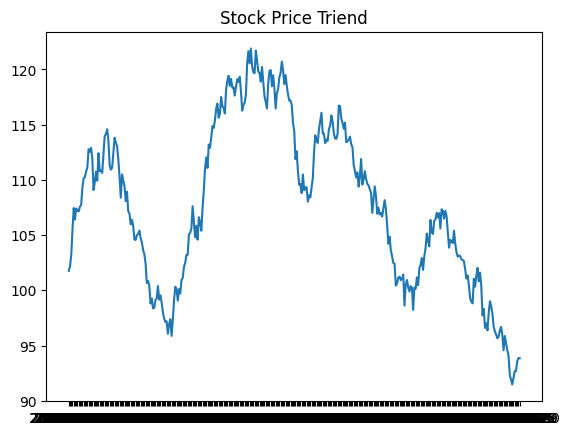

In [ ]:
plt.plot(df['Date'], df['Stock_1'])
plt.title("Stock Price Triend")
plt.show()

array([[<Axes: title={'center': 'Stock_1'}>]], dtype=object)

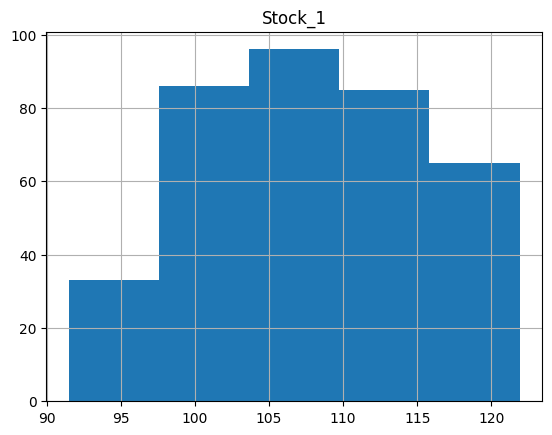

In [ ]:
df.hist('Stock_1',bins = 5)

##**Skewness & Kurtosis:**
*The distribution is approximately normal and symmetric as skewness is close to zero.
The negative kurtosis indicates a platykurtic distribution with lighter tails compared to a normal distribution.*

In [ ]:
print(f"Skewness : {df['Stock_1'].skew()}")
print(f"Kurtosis : {df['Stock_1'].kurt()}")

Skewness : -0.04017683290325831
Kurtosis : -0.9467545855332533


##**Histogram of all stocks:**

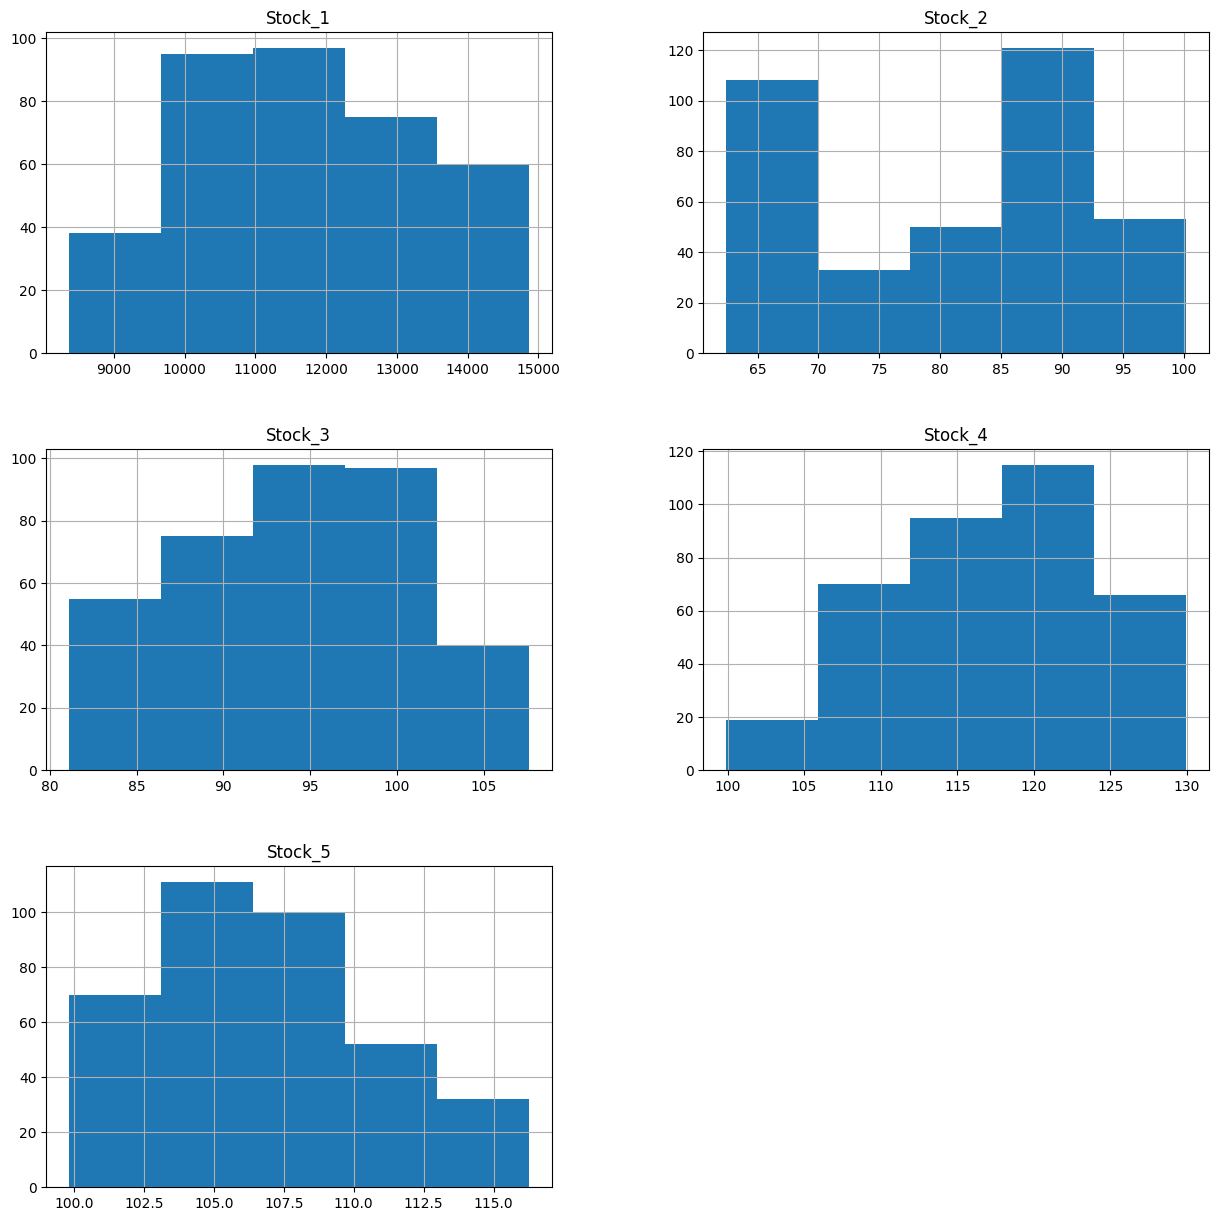

In [ ]:
stocks = df[['Stock_1', 'Stock_2', 'Stock_3', 'Stock_4', 'Stock_5']]

stocks.hist(bins = 5, figsize = (15,15))
plt.title("Histogram of all stocks")
plt.show()

##**Destribution of target :**

Text(0, 0.5, 'Frequency')

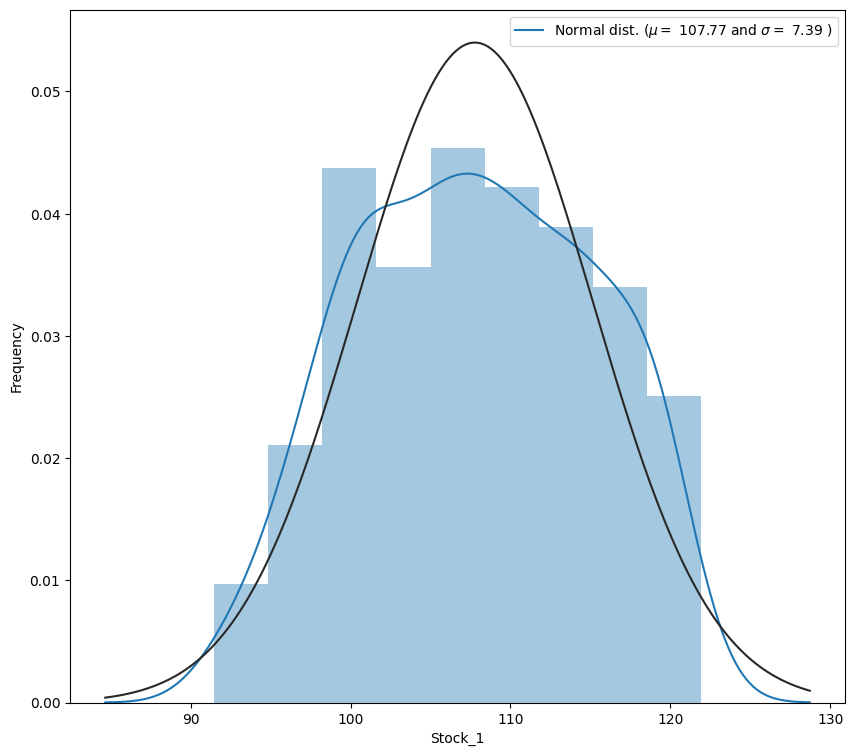

In [ ]:
from scipy import stats

plt.subplots(figsize=(10,9))
sns.distplot(df['Stock_1'], fit=stats.norm)

(mu, sigma) = stats.norm.fit(df['Stock_1'])

# plot with the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

In [ ]:
df['Stock_1']

,Stock_1
0,101.764052
1,102.171269
2,103.171258
3,105.483215
4,107.453175
...,...
360,92.684784
361,92.688279
362,93.551993
363,93.870037


##**Applying log function for normal destribution :**

Text(0, 0.5, 'Frequency')

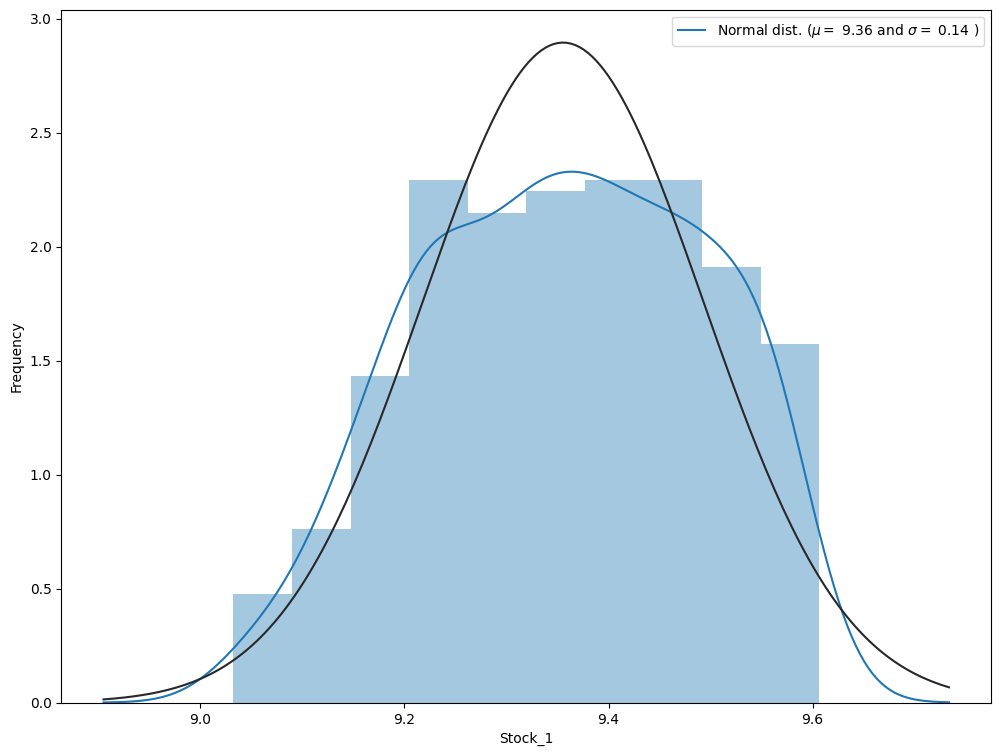

In [ ]:
#we use log function which is in numpy
import numpy as np
df['Stock_1'] = np.log1p(df['Stock_1'])

#Check again for more normal distribution
plt.subplots(figsize=(12,9))
sns.distplot(df['Stock_1'], fit=stats.norm)

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(df['Stock_1'])

# plot with the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

##**Scatter plots**

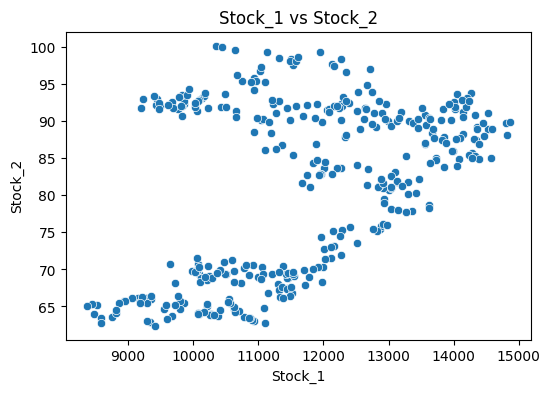

In [ ]:
#Check relation between stock 1 and stock 2
plt.figure(figsize = (6, 4))
sns.scatterplot(x = 'Stock_1', y = 'Stock_2', data = df)
plt.title("Stock_1 vs Stock_2")
plt.show()

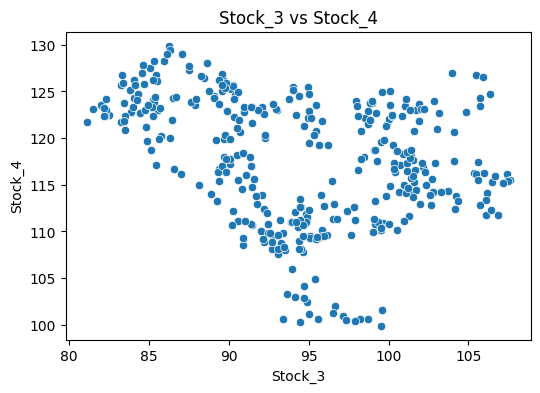

In [ ]:
#Check relation between stock 3 and stock 4
plt.figure(figsize = (6, 4))
sns.scatterplot(x = 'Stock_3', y = 'Stock_4', data = df)
plt.title("Stock_3 vs Stock_4")
plt.show()

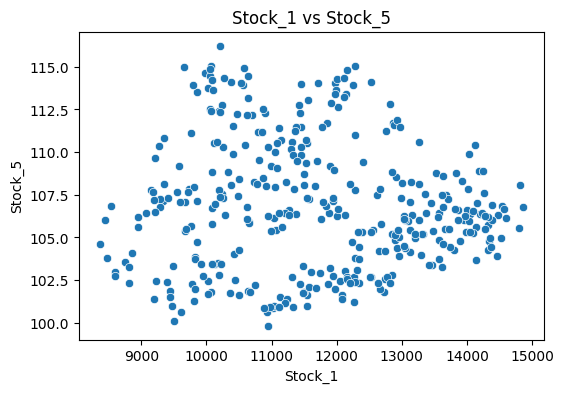

In [ ]:
#Check relation between stock 1 and stock 5
plt.figure(figsize = (6, 4))
sns.scatterplot(x = 'Stock_1', y = 'Stock_5', data = df)
plt.title("Stock_1 vs Stock_5")
plt.show()

##**Correlation Heatmap:**

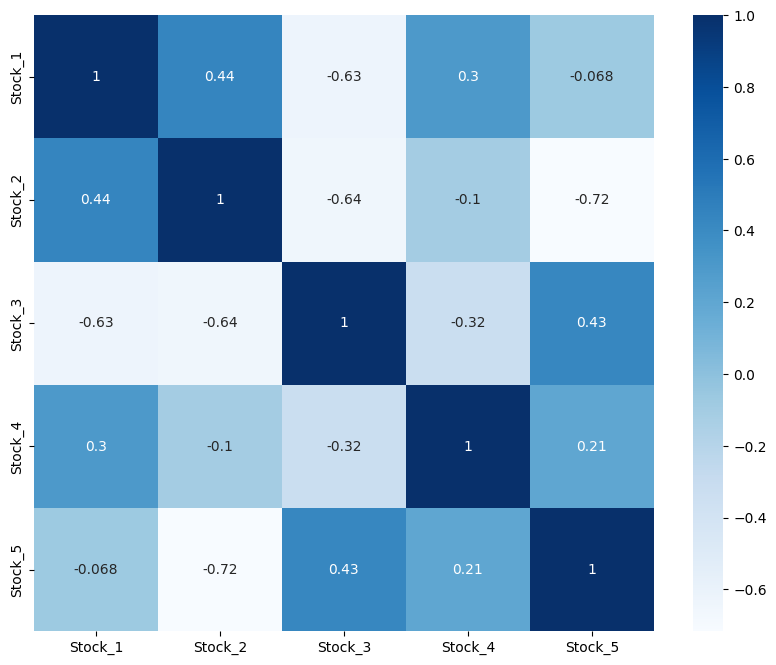

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(numeric_only=True), annot = True,cmap = 'Blues')
plt.show()

##**Divide data into X & Y:**

In [ ]:
y = df['Stock_1']
x = df.drop(columns = ['Date', 'Stock_1'])

##**Train test split**



In [ ]:
x_train , x_test, y_train , y_test = train_test_split(x, y , test_size = 0.20, random_state = 42)

In [ ]:
x_train.columns

Index(['Stock_2', 'Stock_3', 'Stock_4', 'Stock_5'], dtype='object')

##**Data shape:**

In [ ]:
print("X train shape :", x_train.shape)
print("X test shape :", x_test.shape)
print("Y train shape :", y_train.shape)
print("y test shape :", y_test.shape)

X train shape : (292, 4)
X test shape : (73, 4)
Y train shape : (292,)
y test shape : (73,)


##**Model training :**

In [ ]:
#DEFINE MODELS
# A dictionary named models is created to store all five regression models.

models = {
    "LinearRegression": LinearRegression(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "GradientBoostingRegressor": GradientBoostingRegressor(n_estimators=100, max_depth=4, random_state=42),
    "SVR": SVR(kernel='linear', C=1.0)
}

#TRAIN MODELS
#This loop trains each model one by one using the training dataset (X_train, y_train).
print("====== TRAINING MODELS ======\n")
for name, model in models.items():
    model.fit(x_train, y_train)
    print(f"{name} trained.")

====== TRAINING MODELS ======

LinearRegression trained.
DecisionTreeRegressor trained.
RandomForestRegressor trained.
GradientBoostingRegressor trained.
SVR trained.


##**Model accuracy or prediction:**

In [ ]:
#Predict and check accuracy
# creates an empty dictionaryto store the accuracy values (acc) of each model while the loop runs.
results={}
for name, model in models.items():
    acc = model.score(x_test, y_test) * 100

    results[name] = acc  # store accuracy for comparison graph

    print(f"Model: {name}")
    print(f"ACCURACY --> {round(float(acc),4)}%\n")

Model: LinearRegression
ACCURACY --> 38.4193%

Model: DecisionTreeRegressor
ACCURACY --> 82.0665%

Model: RandomForestRegressor
ACCURACY --> 88.8129%

Model: GradientBoostingRegressor
ACCURACY --> 89.5353%

Model: SVR
ACCURACY --> 11.2359%



##**Regression Metrics :**

In [ ]:
# METRICS CALCULATION
# Lopp for Metrics
for name, model in models.items():
    y_pred = model.predict(x_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    acc = model.score(x_test, y_test) * 100


#Displays all metrics for each model in a clean format on the console.
    print(f"------ {name} ------")
    print(f"Mean Absolute Error : {round(float(mae),4)}")
    print(f"Mean Squared Error : {round(float(mse), 4)}")
    print(f"Root Mean Squared Error : {round(float(rmse),4)}")
    print(f"R-squared : {round(float(r2), 4)}")
    print(f"ACCURACY --> {round(float(acc),4)}%\n")

------ LinearRegression ------
Mean Absolute Error : 907.7875
Mean Squared Error : 1334956.1868
Root Mean Squared Error : 1155.403
R-squared : 0.3842
ACCURACY --> 38.4193%

------ DecisionTreeRegressor ------
Mean Absolute Error : 380.6914
Mean Squared Error : 388764.5747
Root Mean Squared Error : 623.5099
R-squared : 0.8207
ACCURACY --> 82.0665%

------ RandomForestRegressor ------
Mean Absolute Error : 347.9092
Mean Squared Error : 242514.8274
Root Mean Squared Error : 492.4579
R-squared : 0.8881
ACCURACY --> 88.8129%

------ GradientBoostingRegressor ------
Mean Absolute Error : 365.6535
Mean Squared Error : 226854.62
Root Mean Squared Error : 476.2926
R-squared : 0.8954
ACCURACY --> 89.5353%

------ SVR ------
Mean Absolute Error : 1008.1402
Mean Squared Error : 1924242.7842
Root Mean Squared Error : 1387.1708
R-squared : 0.1124
ACCURACY --> 11.2359%



##**Applying Anti-Log to Convert 'Stock 1' Back to Original Scale**

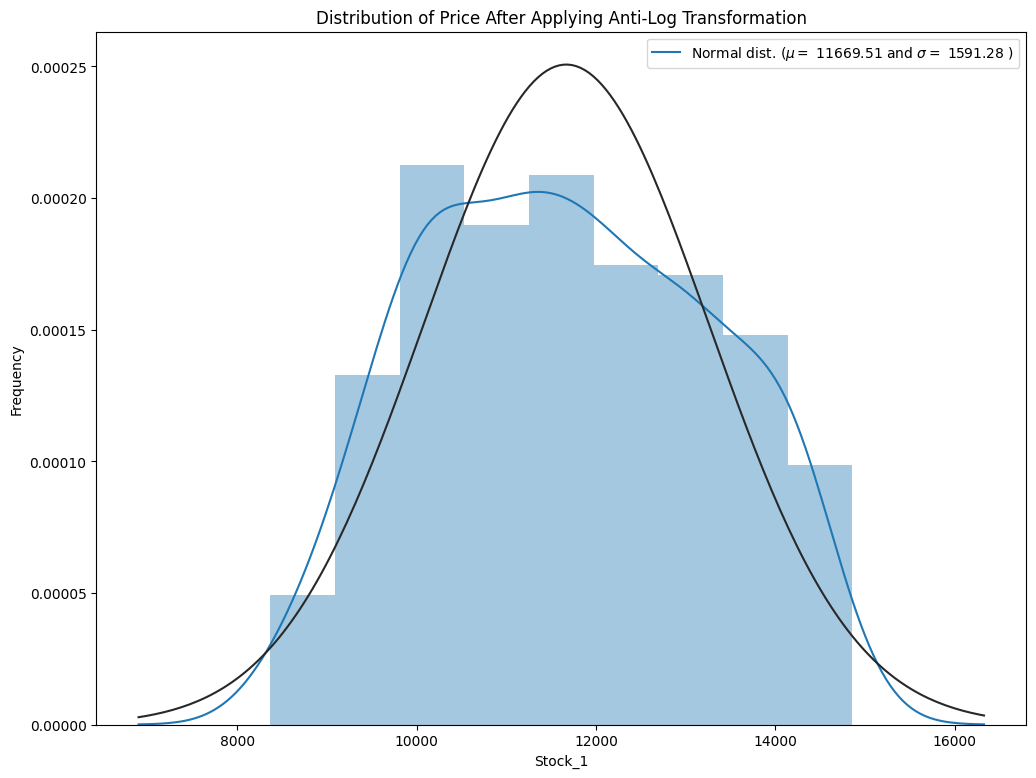

In [ ]:
# Now apply anti-log to get back original values
df['Stock_1'] = np.expm1(df['Stock_1'])

plt.subplots(figsize=(12,9))
sns.distplot(df['Stock_1'], fit=stats.norm)
(mu, sigma) = stats.norm.fit(df['Stock_1'])

# Plot with the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.title("Distribution of Price After Applying Anti-Log Transformation")
plt.ylabel('Frequency')
plt.xlabel('Stock_1')
plt.show()

##**Model Accuracy Comparison (Bar Chart Visualization)**

------ MODEL ACCURACY COMPARISON ------

                       Model   Accuracy
0           LinearRegression  38.419311
1      DecisionTreeRegressor  82.066535
2      RandomForestRegressor  88.812944
3  GradientBoostingRegressor  89.535339
4                        SVR  11.235891


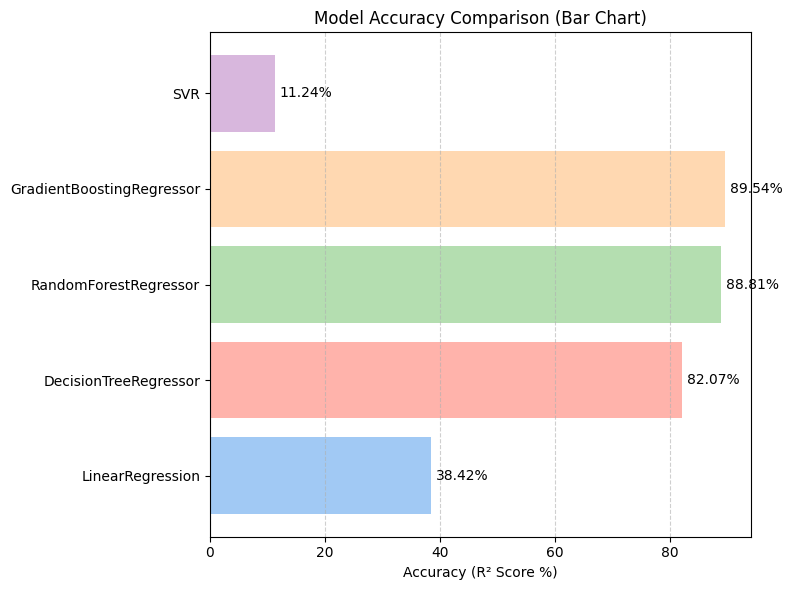

In [ ]:
# CONVERT RESULTS TO DATAFRAME
#This converts the dictionary into a DataFramed
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])
print("------ MODEL ACCURACY COMPARISON ------\n")
print(results_df)

#BAR CHART COMPARISON
#Draws a horizontal bar chart using soft pastel colors for better readability.
plt.figure(figsize=(8,6))
# Soft pastel color palette
colors = ['#A1C9F4', '#FFB3AB', '#B4DEB0', '#FFD8B1', '#D8B7DD', '#B3E2CD']
bars=plt.barh(results_df["Model"], results_df["Accuracy"], color=colors)
plt.xlabel("Accuracy (R² Score %)")
plt.title("Model Accuracy Comparison (Bar Chart)")
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Adds the accuracy percentage label next to each bar for clarity.
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.9, bar.get_y() + bar.get_height()/2,
             f"{width:.2f}%", va='center', fontsize=10)

plt.tight_layout()
plt.show()

##**Regression Models Accuracy Comparison (Pie Chart Visualization)**

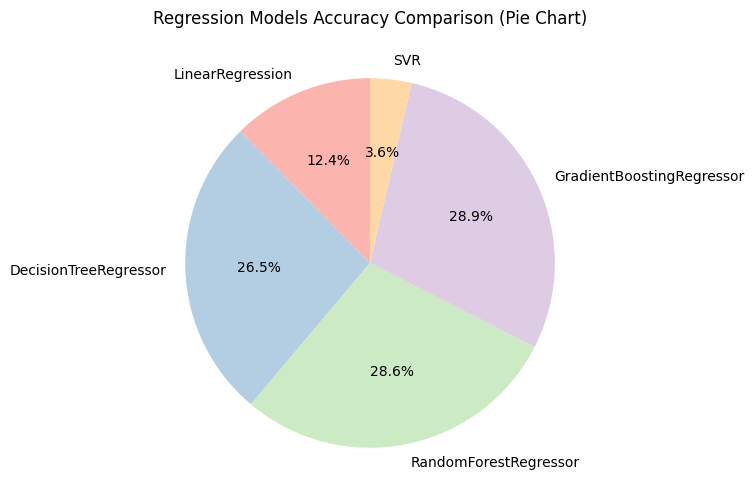

In [ ]:
#PIE CHART
plt.figure(figsize=(6,6))
plt.pie(results_df["Accuracy"],
        #Displays each model’s name
        labels=results_df["Model"],
        autopct='%1.1f%%',
        colors=plt.cm.Pastel1.colors,
        startangle=90)
plt.title("Regression Models Accuracy Comparison (Pie Chart)")
plt.show()

##**Short Summary: Stock price Prediction:**

---
This project aims to predict stock prices using historical stock data and machine learning techniques. After performing data exploration, preprocessing, and feature analysis, multiple regression models were trained and evaluated. **The Gradient Boosting Regressor achieved the highest accuracy of approximately 89%**, highlighting the effectiveness of ensemble models for stock price prediction.